In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm

In [13]:
#데이터 가져오기
il = open('ioutput.txt','r')
data = il.read().splitlines()

In [14]:
# 파일 명으로 데이터 구분하기
title = title = [s for s in data if 'File: ' in s]
title_index = [i for i in range(len(data)) if 'File: ' in data[i]]

In [15]:
# 결과가 존재하는 파일의 index만 추출
success_data_index = []
for i in range(len(title_index)-1):
    gap = title_index[i] - title_index[i+1]
    if gap == -84:
        j = title_index[i]
        success_data_index.append(j)

# 위의 코드로는 제일 마지막 파일이 포함되지 않아서 추가적으로 확인
if (title_index[-1] - len(data)) == -84:
    success_data_index.append(title_index[-1])

In [16]:
# 앞서 찾은 인덱스 목록으로 데이터 가져오기
sim_title = []
sim_data = []
for i in success_data_index:
    sim_title.append(data[i][11:(len(data[i])-4)].split('_'))
    sim_data.append(data[i+3:i+81])

In [17]:
# 제목의 정보와 통계값의 정보를 각각의 데이터 프레임으로 만듦 (데이터 추출을 편하게 하기 위함)_icache
cache_title_df = pd.DataFrame(columns = ['il1','il1_nsets','il1_bsize','il1_assoc','il1_repl','il2','il2_nsets','il2_bsize','il2_assoc','il2_repl'],data = sim_title)
cache_simul_df = pd.DataFrame(columns = ['sim_num_insn', 'sim_num_refs', 'sim_elapsed_time', 'sim_inst_rate', 'il1.accesses', 'il1.hits', 'il1.misses', 'il1.replacements', 'il1.writebacks',
 'il1.invalidations', 'il1.miss_rate', 'il1.repl_rate', 'il1.wb_rate', 'il1.inv_rate', 'il2.accesses', 'il2.hits', 'il2.misses', 'il2.replacements',
 'il2.writebacks', 'il2.invalidations', 'il2.miss_rate', 'il2.repl_rate', 'il2.wb_rate', 'il2.inv_rate', 'dl1.accesses', 'dl1.hits', 'dl1.misses',
 'dl1.replacements', 'dl1.writebacks', 'dl1.invalidations', 'dl1.miss_rate', 'dl1.repl_rate', 'dl1.wb_rate', 'dl1.inv_rate ', 'ul2.accesses', 'ul2.hits',
 'ul2.misses', 'ul2.replacements', 'ul2.writebacks', 'ul2.invalidations', 'ul2.miss_rate', 'ul2.repl_rate', 'ul2.wb_rate', 'ul2.inv_rate', 'itlb.accesses',
 'itlb.hits', 'itlb.misses', 'itlb.replacements', 'itlb.writebacks', 'itlb.invalidations', 'itlb.miss_rate', 'itlb.repl_rate', 'itlb.wb_rate', 'itlb.inv_rate',
 'dtlb.accesses', 'dtlb.hits', 'dtlb.misses', 'dtlb.replacements', 'dtlb.writebacks', 'dtlb.invalidations', 'dtlb.miss_rate', 'dtlb.repl_rate', 'dtlb.wb_rate',
 'dtlb.inv_rate', 'ld_text_base', 'ld_text_size', 'ld_data_base', "ld_data_size", 'ld_stack_base', 'ld_stack_size', 'ld_prog_entry', 'ld_environ_base',
 'ld_target_big_endian', 'mem.page_count', 'mem.page_mem', 'mem.ptab_misses', 'mem.ptab_accesses', 'mem.ptab_miss_rate'], data = sim_data)

In [18]:
## cache_simul_df에 있는 문자들을 제거하고 필요한 데이터만 저장함
Data = []
for i in range(len(cache_simul_df)):
    row = []
    for j in cache_simul_df.columns.tolist():
        row.append(cache_simul_df.iloc[i].loc[j][len(j):cache_simul_df.iloc[i].loc[j].find("#")-1])
    Data.append(row)

cache_data_df = pd.DataFrame(columns = cache_simul_df.columns.tolist(), data = Data)

In [19]:
# title 데이터 프레임과 data 데이터 프레임을 합쳐서 하나의 데이터 프레임으로 만듦
cache_df = pd.concat([cache_title_df,cache_data_df],axis = 1)

In [20]:
# 시뮬레이션에 성공은 했지만 오류가 발생한 데이터 제거
refine = []
for i in range(len(cache_df)):
    if int(cache_df['sim_num_insn'][i])!=0 :
        refine.append(i)
useful_data = cache_df.iloc[refine]

In [3]:
# 데이터 백업 및 타입 변경을 위한 csv파일 저장 및 읽기
useful_data.to_csv('cache_simul_useful_data.csv',index = False)
Data_df = pd.read_csv('cache_simul_useful_data.csv')

In [4]:
# 분석을 진행할 항목만 추출
target_df3 = Data_df.iloc[:,[1,2,3,4,6,7,8,9,16,20,26,30]]

In [5]:
# 분석의 가정을 활용하기 위해 il2_size 계산해서 추가하기
il2_size = pd.DataFrame(columns = ['il2_size'],data = np.array(target_df3.iloc[:,4])*np.array(target_df3.iloc[:,5])*np.array(target_df3.iloc[:,6]))
target_df4 = pd.concat([il2_size,target_df3],axis = 1)

In [6]:
# il2_size 별로 데이터 분리
ratio2 = []
ratio4 = []
ratio8 = []
for i in range(len(target_df4)):
    division = target_df4.iloc[i,0]
    if division == 8192:
        ratio2.append(i)
    elif division == 16384:
        ratio4.append(i)
    else:
        ratio8.append(i)

ratio2_df = target_df4.iloc[ratio2]
ratio4_df = target_df4.iloc[ratio4]
ratio8_df = target_df4.iloc[ratio8]

In [7]:
#ratio2에서 가장 missrate가 낮은 구성을 il1기준, il2 기준으로 각각 가져옴
ratio2_df.sort_values('il1.miss_rate').head(6)

,il2_size,il1_nsets,il1_bsize,il1_assoc,il1_repl,il2_nsets,il2_bsize,il2_assoc,il2_repl,il1.misses,il1.miss_rate,il2.misses,il2.miss_rate
15458,8192,4,128,8,r,4,512,4,r,14058,0.0141,5705,0.4058
12544,8192,4,128,8,r,2,4096,1,r,14107,0.0141,5503,0.3901
5427,8192,4,128,8,r,16,256,2,r,14130,0.0141,6435,0.4554
12999,8192,4,128,8,r,8,512,2,r,14227,0.0142,5778,0.4061
5532,8192,4,128,8,r,2,1024,4,f,14231,0.0142,5853,0.4113
14477,8192,4,128,8,r,1,4096,2,f,14231,0.0142,5369,0.3773


In [8]:
ratio2_df.sort_values('il2.miss_rate').head(6)

,il2_size,il1_nsets,il1_bsize,il1_assoc,il1_repl,il2_nsets,il2_bsize,il2_assoc,il2_repl,il1.misses,il1.miss_rate,il2.misses,il2.miss_rate
21628,8192,512,8,1,r,4,128,16,l,134103,0.1341,4093,0.0305
10073,8192,512,8,1,f,4,128,16,l,134103,0.1341,4093,0.0305
7743,8192,512,8,1,l,4,128,16,l,134103,0.1341,4093,0.0305
7256,8192,512,8,1,f,4,128,16,f,134103,0.1341,4397,0.0328
9618,8192,512,8,1,r,4,128,16,f,134103,0.1341,4397,0.0328
8689,8192,512,8,1,l,4,128,16,f,134103,0.1341,4397,0.0328


In [9]:
# 위에서 진행한 결과는 각각의 구성이 매우 달라 종합적인 판단을 위해 AMAT 계산 
# (l1 hit time = 1, l1 miss penalty = 10, l2 miss penalty 100)로 가정한다.
amat = 1 + ratio2_df.iloc[:,-3]*10 + ratio2_df.iloc[:,-3]*ratio2_df.iloc[:,-1]*100
amat_df = pd.DataFrame(columns = ['amat'], data = amat)
ratio2_amat_df = pd.concat([ratio2_df, amat_df],axis = 1)

In [10]:
ratio2_amat_df.sort_values('amat').head(10)

,il2_size,il1_nsets,il1_bsize,il1_assoc,il1_repl,il2_nsets,il2_bsize,il2_assoc,il2_repl,il1.misses,il1.miss_rate,il2.misses,il2.miss_rate,amat
13157,8192,4,128,8,l,1,4096,2,l,14490,0.0145,4902,0.3383,1.635535
23530,8192,4,128,8,l,1,4096,2,f,14490,0.0145,5000,0.3451,1.645395
15150,8192,4,128,8,l,1,2048,4,l,14490,0.0145,5078,0.3504,1.653080
21589,8192,4,128,8,r,1,2048,4,l,14231,0.0142,5139,0.3611,1.654762
8066,8192,4,128,8,l,2,4096,1,f,14490,0.0145,5126,0.3538,1.658010
21293,8192,4,128,8,l,2,4096,1,r,14490,0.0145,5126,0.3538,1.658010
722,8192,4,128,8,l,2,4096,1,l,14490,0.0145,5126,0.3538,1.658010
7068,8192,8,64,8,l,1,4096,2,l,19281,0.0193,4667,0.2421,1.660253
839,8192,4,128,8,l,2,2048,2,l,14490,0.0145,5166,0.3565,1.661925
2846,8192,4,128,8,l,1,2048,4,f,14490,0.0145,5175,0.3571,1.662795


In [11]:
#회귀분석을 통해 각 항목이 어느정도의 영향력이 있는지 확인함
x_data = ratio2_amat_df.iloc[:,[1,2,3,5,6,7]].values
ydata = ratio2_amat_df.iloc[:,-1].values
xdata = sm.add_constant(x_data, has_constant = 'add')

multi_model = sm.OLS(ydata, xdata)
fitted_multi_model = multi_model.fit()
fitted_multi_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.799
Model:                            OLS   Adj. R-squared:                  0.799
Method:                 Least Squares   F-statistic:                     4832.
Date:                Wed, 13 Dec 2023   Prob (F-statistic):               0.00
Time:                        15:35:52   Log-Likelihood:                -2792.8
No. Observations:                7308   AIC:                             5600.
Df Residuals:                    7301   BIC:                             5648.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.1384      0.013    160.396      0.000       2.112       2.165
x1             0.0029   4.19e-05     68.931      0.000       0.003       0.003
x2             0.0014   3.51e-05     40.048      0.000       0.001       0.001
x3            -0.0458      0.002    -25.807      0.000      -0.049      -0.042
x4             0.0050   4.42e-05    114.153      0.000       0.005       0.005
x5          7.469e-05   4.32e-06     17.289      0.000    6.62e-05    8.32e-05
x6            -0.0184      0.001    -19.917      0.000      -0.020      -0.017
==============================================================================
Omnibus:                     1603.936   Durbin-Watson:                   2.024
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            16689.177
Skew:                           0.751   Prob(JB):                         0.00
Kurtosis:                      10.249   Cond. No.                     4.33e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.33e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

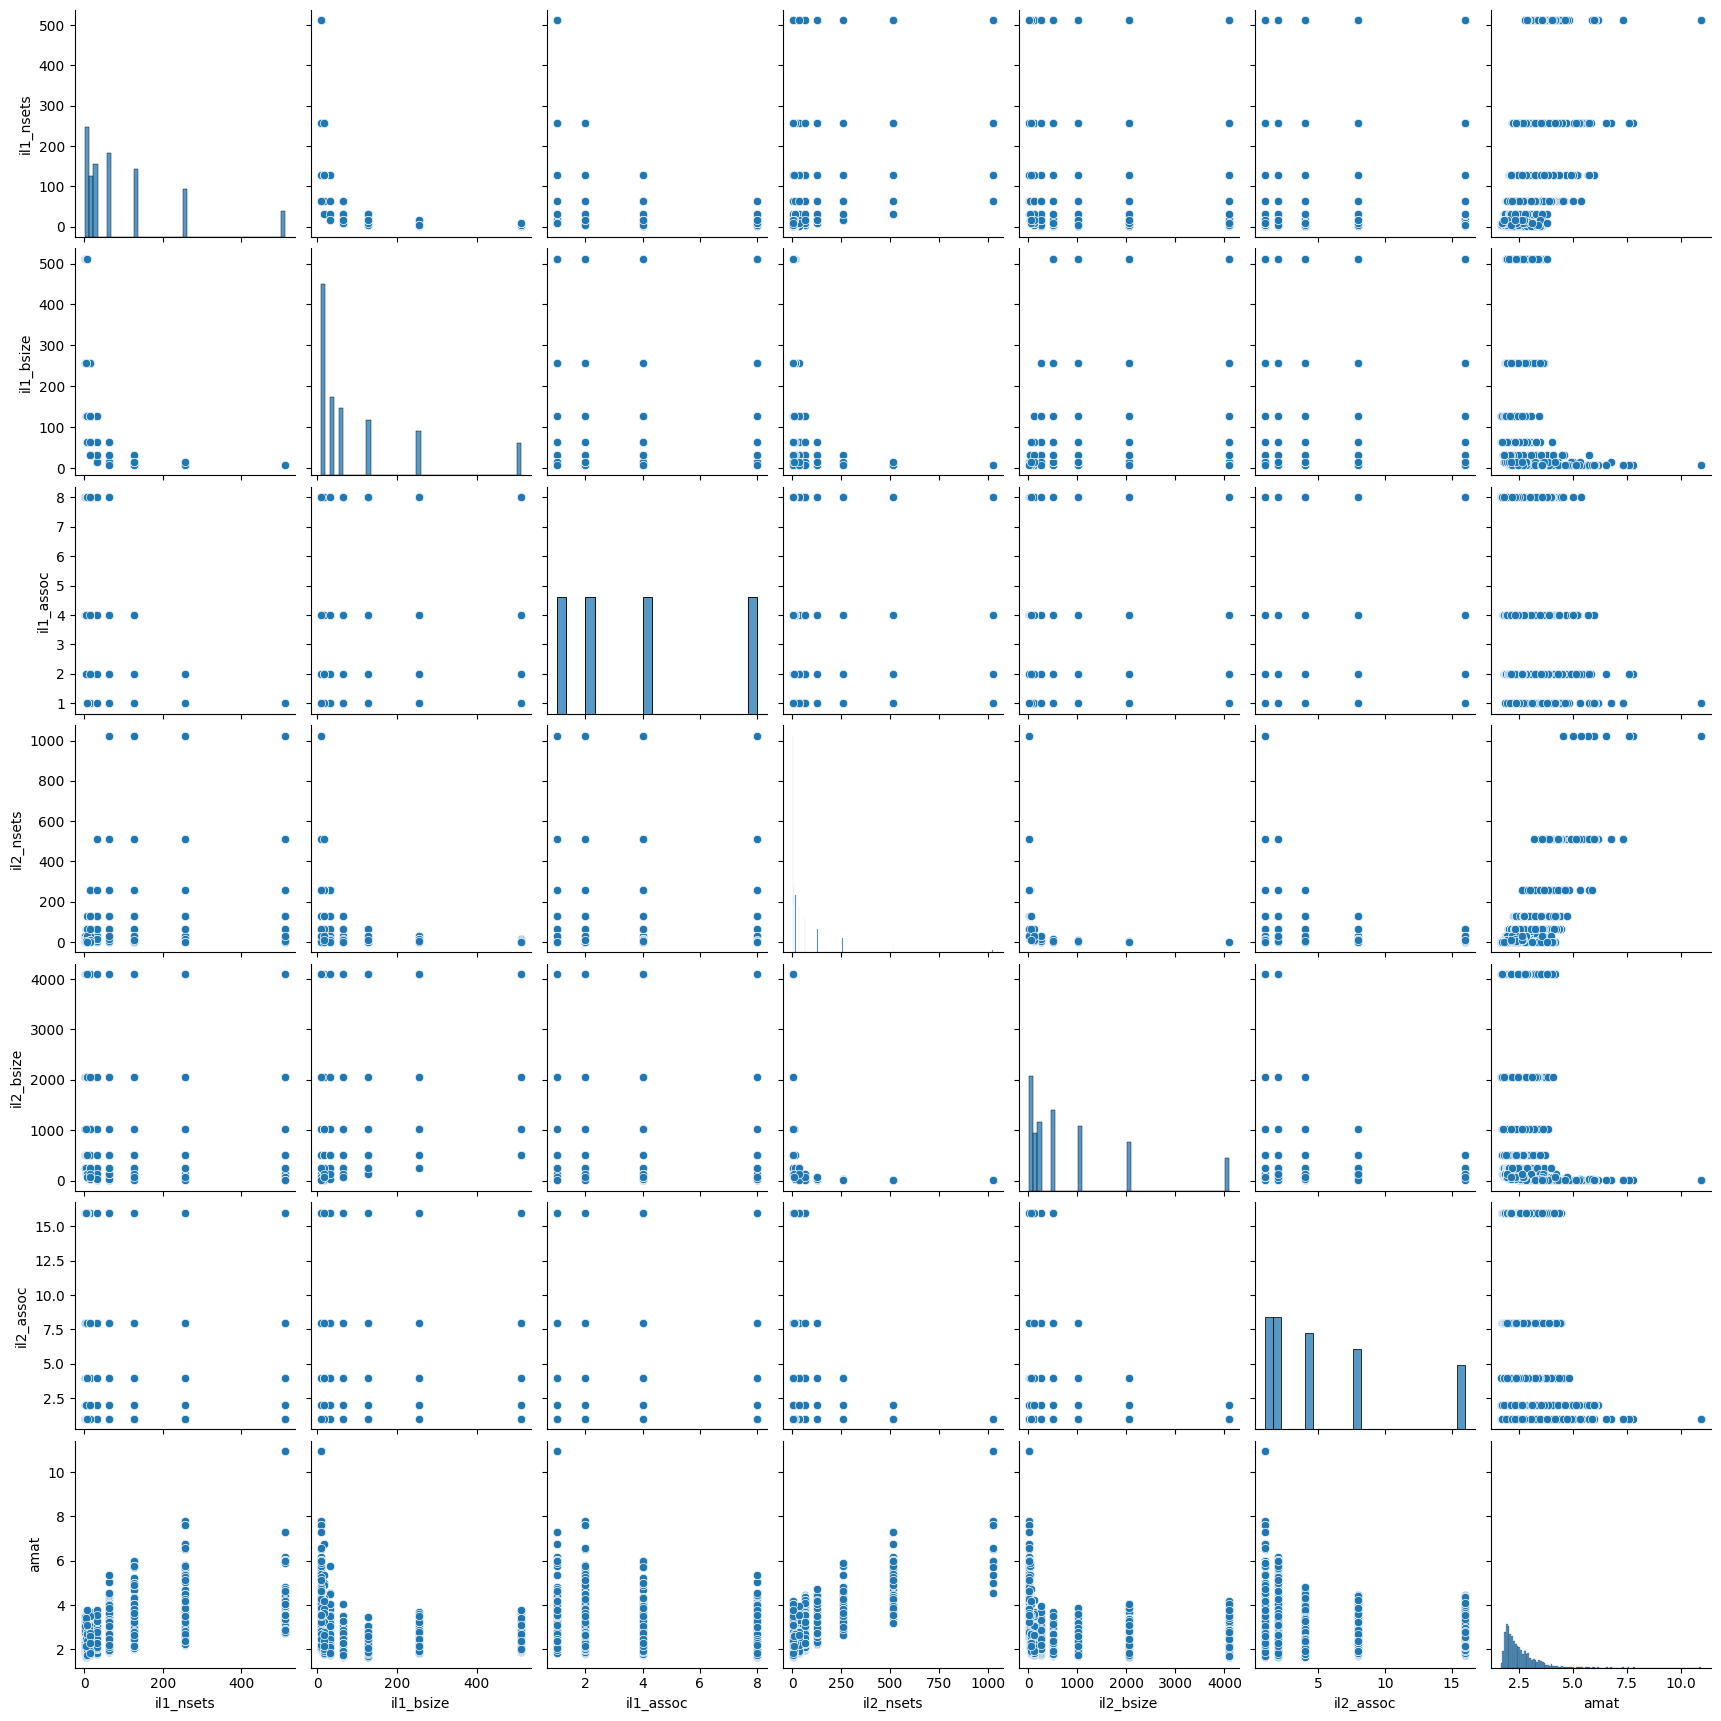

In [30]:
sns.pairplot(ratio2_amat_df, vars = ['il1_nsets','il1_bsize','il1_assoc','il2_nsets','il2_bsize','il2_assoc','amat'])

In [12]:
# ratio4의 경우도 계산함
amat = 1 + ratio4_df.iloc[:,-3]*10 + ratio4_df.iloc[:,-3]*ratio4_df.iloc[:,-1]*100
amat_df = pd.DataFrame(columns = ['amat'], data = amat)
ratio4_amat_df = pd.concat([ratio4_df, amat_df],axis = 1)
ratio4_amat_df.sort_values('amat').head(10)

,il2_size,il1_nsets,il1_bsize,il1_assoc,il1_repl,il2_nsets,il2_bsize,il2_assoc,il2_repl,il1.misses,il1.miss_rate,il2.misses,il2.miss_rate,amat
155,16384,4,128,8,r,4,256,16,l,14231,0.0142,1929,0.1355,1.334410
7325,16384,4,128,8,l,4,256,16,l,14490,0.0145,1982,0.1368,1.343360
5867,16384,4,128,8,r,2,512,16,l,14231,0.0142,2036,0.1431,1.345202
13684,16384,4,128,8,f,4,256,16,l,15233,0.0152,1957,0.1285,1.347320
18411,16384,4,128,8,r,4,256,16,f,14231,0.0142,2089,0.1468,1.350456
7930,16384,4,128,8,l,4,256,16,f,14490,0.0145,2097,0.1447,1.354815
16221,16384,4,128,8,r,8,128,16,l,14231,0.0142,2140,0.1504,1.355568
18681,16384,4,128,8,l,8,128,16,l,14490,0.0145,2184,0.1507,1.363515
11605,16384,4,128,8,r,16,128,8,l,14231,0.0142,2231,0.1568,1.364656
9374,16384,4,128,8,f,4,256,16,f,15233,0.0152,2134,0.1401,1.364952


In [13]:
#회귀분석을 통해 각 항목이 어느정도의 영향력이 있는지 확인함
x_data = ratio4_amat_df.iloc[:,[1,2,3,5,6,7]].values
ydata = ratio4_amat_df.iloc[:,-1].values
xdata = sm.add_constant(x_data, has_constant = 'add')

multi_model = sm.OLS(ydata, xdata)
fitted_multi_model = multi_model.fit()
fitted_multi_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.818
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     6031.
Date:                Wed, 13 Dec 2023   Prob (F-statistic):               0.00
Time:                        15:36:03   Log-Likelihood:                 44.607
No. Observations:                8064   AIC:                            -75.21
Df Residuals:                    8057   BIC:                            -26.25
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.6220      0.009    188.794      0.000       1.605       1.639
x1             0.0027   2.72e-05     97.987      0.000       0.003       0.003
x2             0.0008   2.19e-05     37.074      0.000       0.001       0.001
x3            -0.0128      0.001    -11.238      0.000      -0.015      -0.011
x4             0.0018   1.49e-05    118.015      0.000       0.002       0.002
x5          8.652e-05   2.47e-06     35.006      0.000    8.17e-05    9.14e-05
x6            -0.0106      0.001    -18.692      0.000      -0.012      -0.009
==============================================================================
Omnibus:                     2137.565   Durbin-Watson:                   2.004
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            12632.338
Skew:                           1.138   Prob(JB):                         0.00
Kurtosis:                       8.694   Cond. No.                     4.91e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.91e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

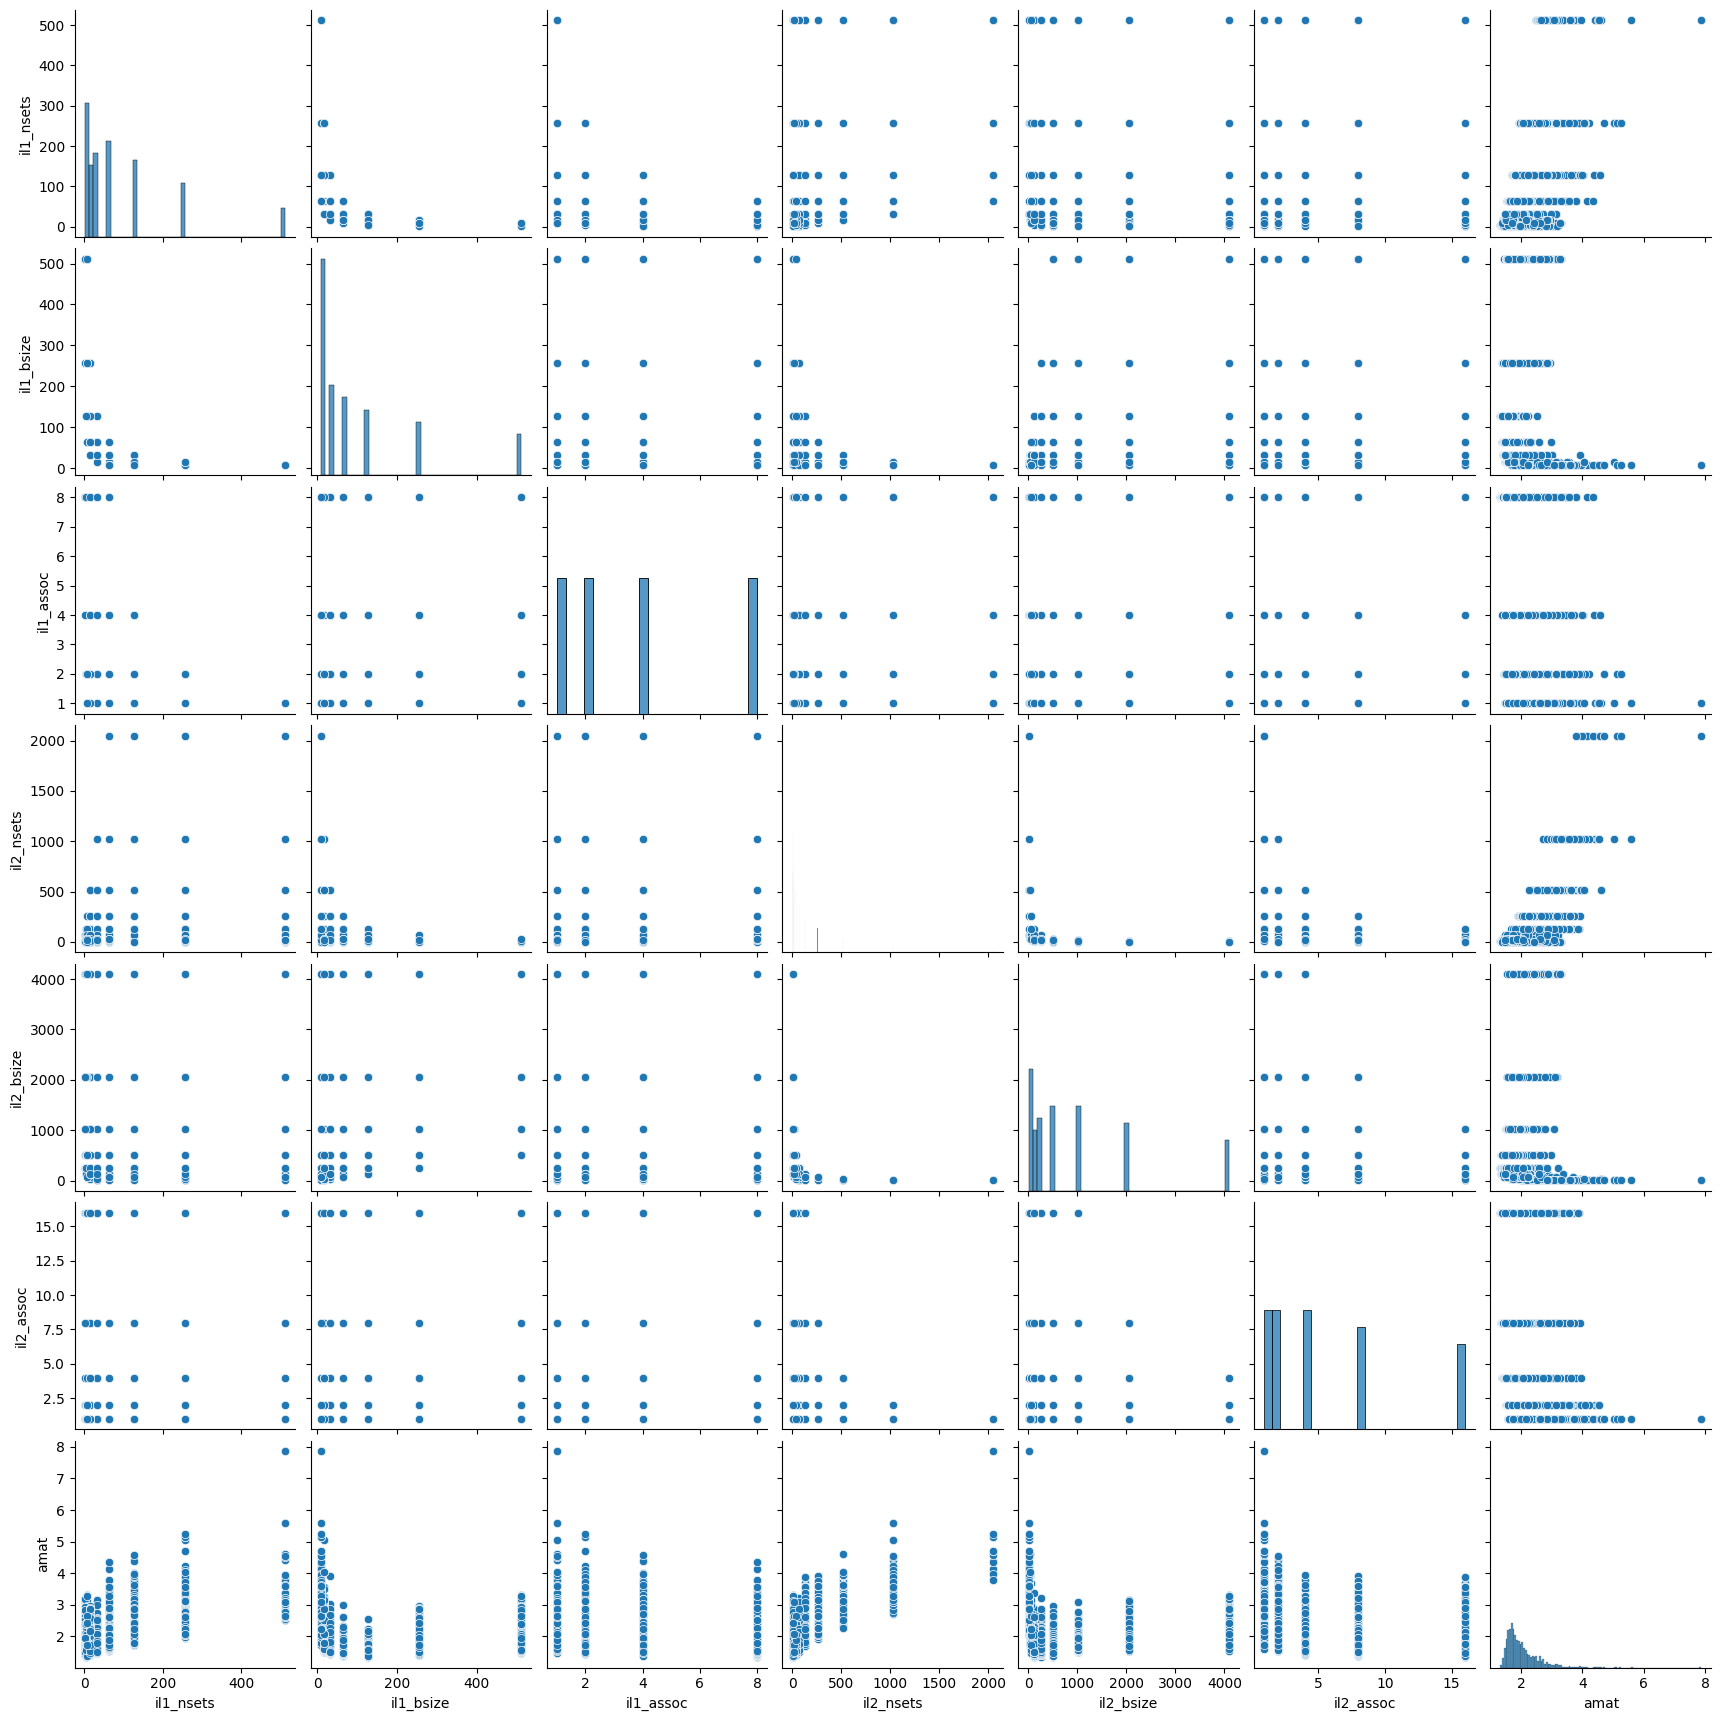

In [33]:
sns.pairplot(ratio4_amat_df, vars = ['il1_nsets','il1_bsize','il1_assoc','il2_nsets','il2_bsize','il2_assoc','amat'])

In [14]:
# ratio8의 경우도 계산함
amat = 1 + ratio8_df.iloc[:,-3]*10 + ratio8_df.iloc[:,-3]*ratio8_df.iloc[:,-1]*100
amat_df = pd.DataFrame(columns = ['amat'], data = amat)
ratio8_amat_df = pd.concat([ratio8_df, amat_df],axis = 1)
ratio8_amat_df.sort_values('amat').head(10)

,il2_size,il1_nsets,il1_bsize,il1_assoc,il1_repl,il2_nsets,il2_bsize,il2_assoc,il2_repl,il1.misses,il1.miss_rate,il2.misses,il2.miss_rate,amat
25,32768,4,128,8,r,4,512,16,l,14231,0.0142,779,0.0547,1.219674
13470,32768,4,128,8,r,8,512,8,l,14231,0.0142,801,0.0563,1.221946
22911,32768,4,128,8,l,4,512,16,l,14490,0.0145,780,0.0538,1.223010
14027,32768,4,128,8,l,8,512,8,l,14490,0.0145,806,0.0556,1.225620
7080,32768,4,128,8,f,4,512,16,l,15233,0.0152,776,0.0509,1.229368
16675,32768,4,128,8,r,2,1024,16,l,14231,0.0142,886,0.0623,1.230466
2914,32768,4,128,8,f,8,512,8,l,15233,0.0152,804,0.0528,1.232256
1895,32768,4,128,8,r,8,256,16,l,14231,0.0142,911,0.0640,1.232880
22243,32768,4,128,8,r,4,512,16,f,14231,0.0142,922,0.0648,1.234016
11269,32768,4,128,8,l,2,1024,16,l,14490,0.0145,895,0.0618,1.234610


In [15]:
#회귀분석을 통해 각 항목이 어느정도의 영향력이 있는지 확인함
x_data = ratio8_amat_df.iloc[:,[1,2,3,5,6,7]].values
ydata = ratio8_amat_df.iloc[:,-1].values
xdata = sm.add_constant(x_data, has_constant = 'add')

multi_model = sm.OLS(ydata, xdata)
fitted_multi_model = multi_model.fit()
fitted_multi_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.853
Method:                 Least Squares   F-statistic:                     8301.
Date:                Wed, 13 Dec 2023   Prob (F-statistic):               0.00
Time:                        15:36:16   Log-Likelihood:                 2308.7
No. Observations:                8568   AIC:                            -4603.
Df Residuals:                    8561   BIC:                            -4554.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.4904      0.006    235.446      0.000       1.478       1.503
x1             0.0026   2.04e-05    126.103      0.000       0.003       0.003
x2             0.0002   1.61e-05      9.624      0.000       0.000       0.000
x3            -0.0062      0.001     -7.325      0.000      -0.008      -0.005
x4             0.0007   5.65e-06    119.396      0.000       0.001       0.001
x5          3.467e-05   1.66e-06     20.853      0.000    3.14e-05    3.79e-05
x6            -0.0075      0.000    -18.962      0.000      -0.008      -0.007
==============================================================================
Omnibus:                     3060.209   Durbin-Watson:                   1.994
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            26439.763
Skew:                           1.468   Prob(JB):                         0.00
Kurtosis:                      11.089   Cond. No.                     5.33e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.33e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

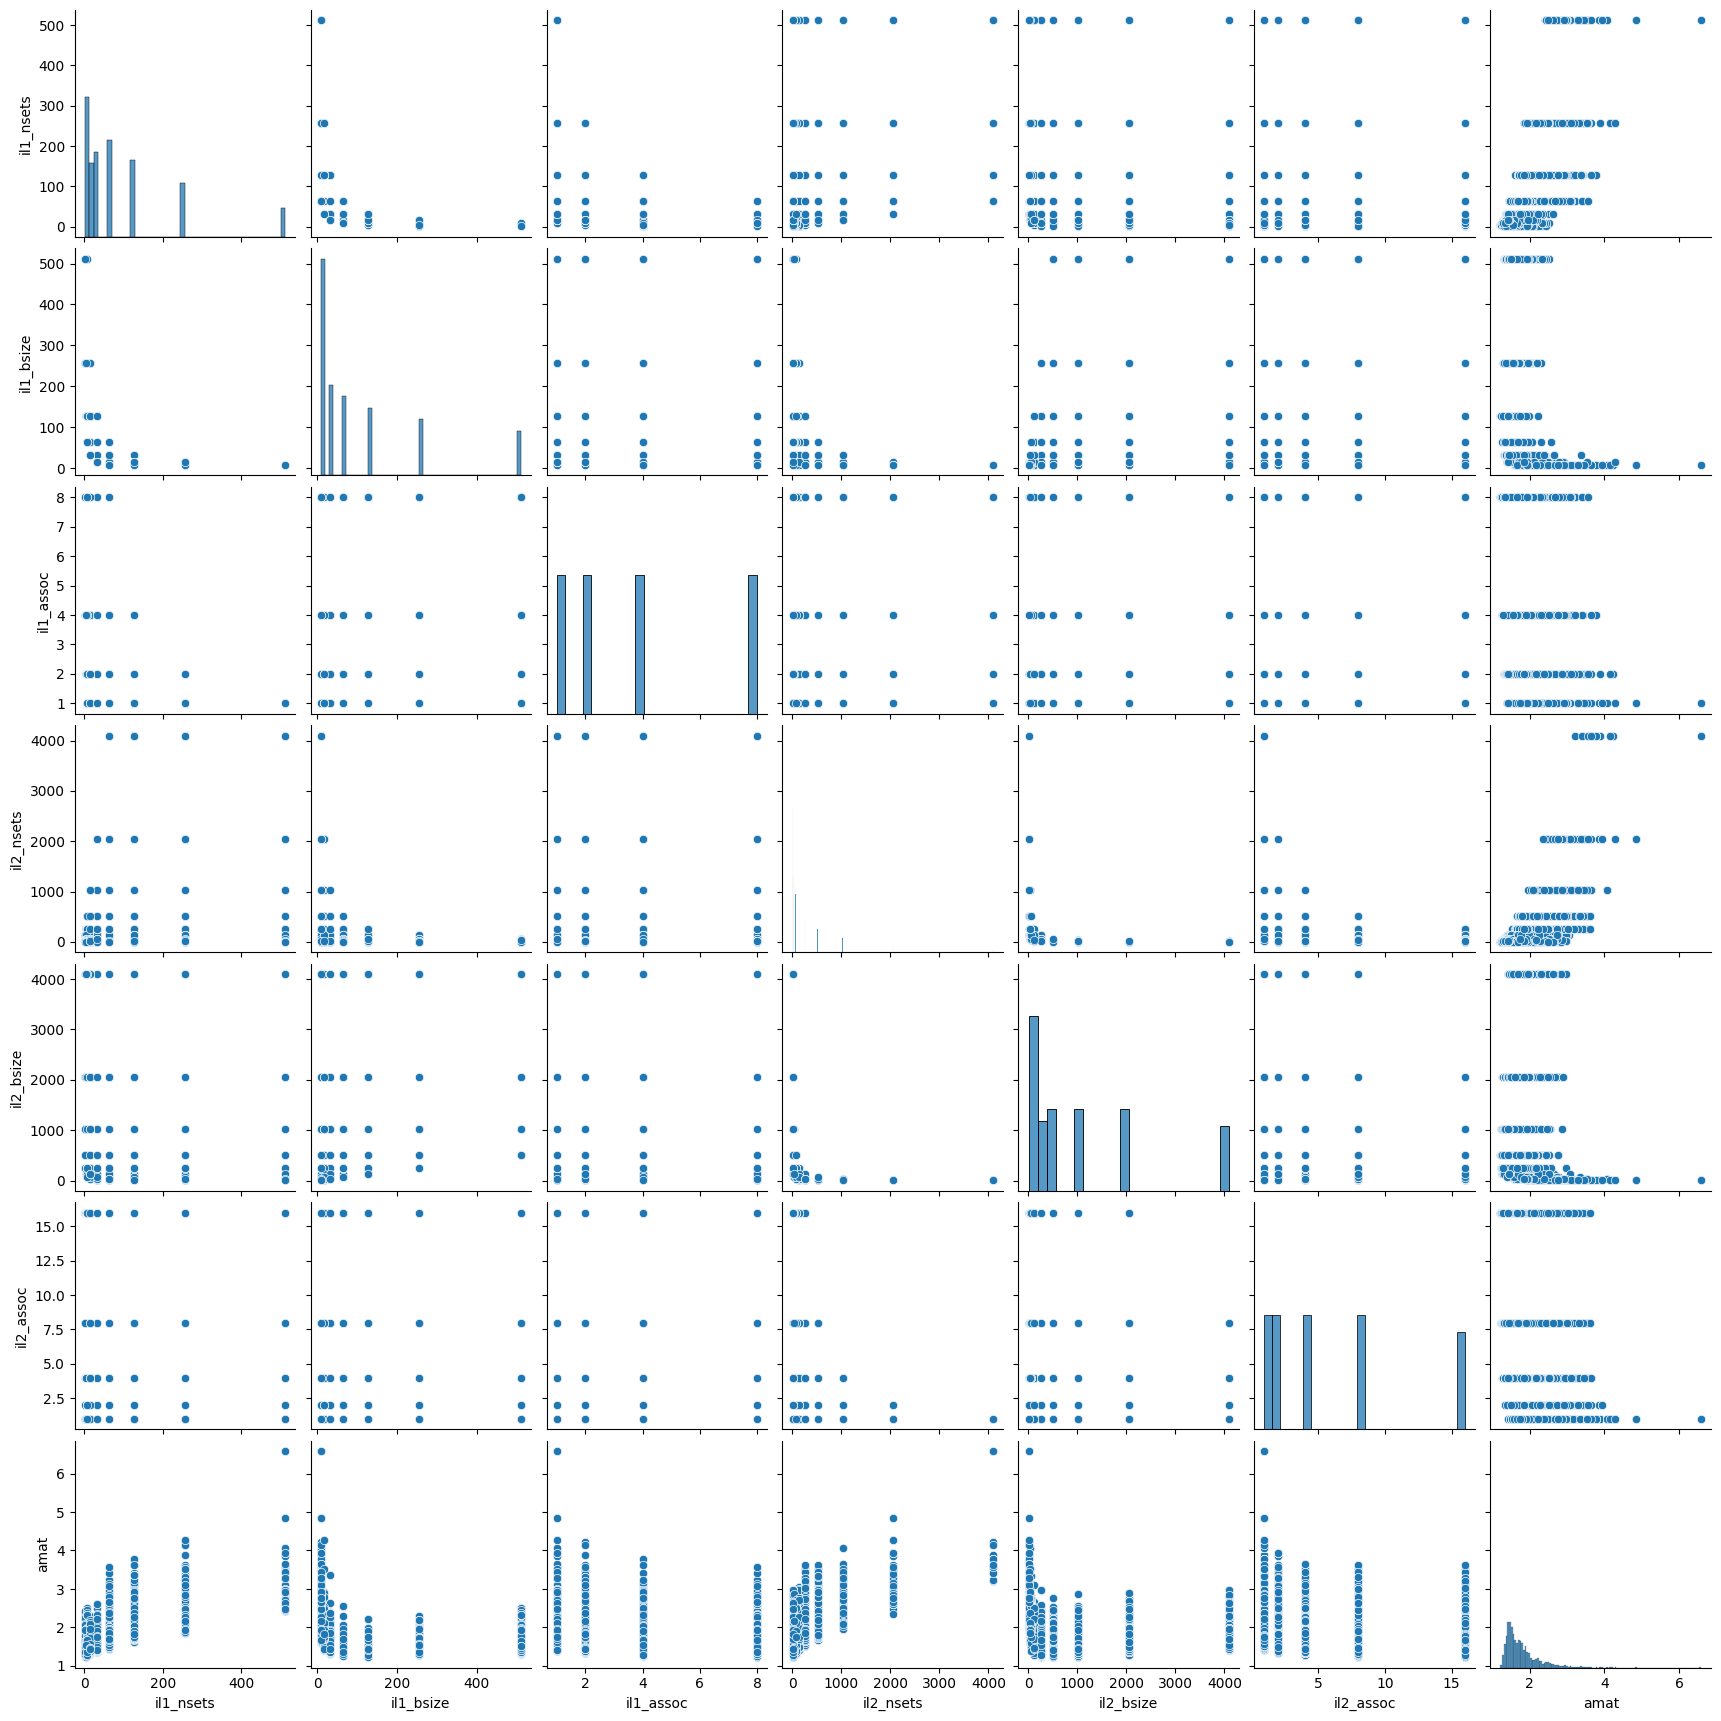

In [36]:
sns.pairplot(ratio8_amat_df, vars = ['il1_nsets','il1_bsize','il1_assoc','il2_nsets','il2_bsize','il2_assoc','amat'])